In [480]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import catboost
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

In [481]:
df=pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [482]:
df=df.drop_duplicates()

In [483]:
# df=df.dropna()

In [484]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,0.00,1.000,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,yes,no,3.0,3.0,Sometimes,yes,3.00,yes,3.00,0.000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,yes,no,2.0,3.0,Sometimes,no,2.00,no,2.00,1.000,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,no,no,3.0,3.0,Sometimes,no,2.00,no,2.00,0.000,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,no,no,2.0,1.0,Sometimes,no,2.00,no,0.00,0.000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,yes,yes,3.0,3.0,Sometimes,no,1.73,no,1.68,0.906,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,yes,yes,3.0,3.0,Sometimes,no,2.01,no,1.34,0.599,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,yes,yes,3.0,3.0,Sometimes,no,2.05,no,1.41,0.646,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,yes,yes,3.0,3.0,Sometimes,no,2.85,no,1.14,0.586,Sometimes,Public_Transportation,Obesity_Type_III


In [485]:

mi_scores=mutual_info_classif(df[["FAF"]],df["NObeyesdad"])
mi_scores

array([0.28237366])

In [486]:
df[["family_history_with_overweight","FAVC","SMOKE","SCC"]]=df[["family_history_with_overweight","FAVC","SMOKE","SCC"]].apply(lambda x:x.map({"yes":1,"no":0}))


C:\Users\soumy\AppData\Local\Temp\ipykernel_17148\1460458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["family_history_with_overweight","FAVC","SMOKE","SCC"]]=df[["family_history_with_overweight","FAVC","SMOKE","SCC"]].apply(lambda x:x.map({"yes":1,"no":0}))


In [487]:
df=df.drop(["NCP","TUE"],axis=1)


In [488]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,CAEC,SMOKE,CH2O,SCC,FAF,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,1,0,2.0,Sometimes,0,2.00,0,0.00,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,1,0,3.0,Sometimes,1,3.00,1,3.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,1,0,2.0,Sometimes,0,2.00,0,2.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,0,0,3.0,Sometimes,0,2.00,0,2.00,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,0,0,2.0,Sometimes,0,2.00,0,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,1,1,3.0,Sometimes,0,1.73,0,1.68,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,1,1,3.0,Sometimes,0,2.01,0,1.34,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,1,1,3.0,Sometimes,0,2.05,0,1.41,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,1,1,3.0,Sometimes,0,2.85,0,1.14,Sometimes,Public_Transportation,Obesity_Type_III


In [489]:
mi_scores=mutual_info_classif(df[["family_history_with_overweight"]],df["NObeyesdad"])
mi_scores

array([0.14753659])

In [490]:
mi_scores=mutual_info_classif(df[["FAVC"]],df["NObeyesdad"])
mi_scores

array([0.05297247])

In [491]:
mi_scores=mutual_info_classif(df[["SMOKE"]],df["NObeyesdad"])
mi_scores

array([0.00600132])

In [492]:
mi_scores=mutual_info_classif(df[["SCC"]],df["NObeyesdad"])
mi_scores

array([0.0334195])

In [493]:
df=df.drop(["FAVC","SMOKE","SCC"],axis=1)
df

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,CAEC,CH2O,FAF,CALC,MTRANS,NObeyesdad
0,Female,21,1.62,64.00,1,2.0,Sometimes,2.00,0.00,no,Public_Transportation,Normal_Weight
1,Female,21,1.52,56.00,1,3.0,Sometimes,3.00,3.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23,1.80,77.00,1,2.0,Sometimes,2.00,2.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27,1.80,87.00,0,3.0,Sometimes,2.00,2.00,Frequently,Walking,Overweight_Level_I
4,Male,22,1.78,89.80,0,2.0,Sometimes,2.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,21,1.71,131.41,1,3.0,Sometimes,1.73,1.68,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,22,1.75,133.74,1,3.0,Sometimes,2.01,1.34,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,23,1.75,133.69,1,3.0,Sometimes,2.05,1.41,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24,1.74,133.35,1,3.0,Sometimes,2.85,1.14,Sometimes,Public_Transportation,Obesity_Type_III


In [494]:
df[["Gender"]]=df[["Gender"]].apply(lambda x:x.map({"Male":1,"Female":0}))
df

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,CAEC,CH2O,FAF,CALC,MTRANS,NObeyesdad
0,0,21,1.62,64.00,1,2.0,Sometimes,2.00,0.00,no,Public_Transportation,Normal_Weight
1,0,21,1.52,56.00,1,3.0,Sometimes,3.00,3.00,Sometimes,Public_Transportation,Normal_Weight
2,1,23,1.80,77.00,1,2.0,Sometimes,2.00,2.00,Frequently,Public_Transportation,Normal_Weight
3,1,27,1.80,87.00,0,3.0,Sometimes,2.00,2.00,Frequently,Walking,Overweight_Level_I
4,1,22,1.78,89.80,0,2.0,Sometimes,2.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,3.0,Sometimes,1.73,1.68,Sometimes,Public_Transportation,Obesity_Type_III
2107,0,22,1.75,133.74,1,3.0,Sometimes,2.01,1.34,Sometimes,Public_Transportation,Obesity_Type_III
2108,0,23,1.75,133.69,1,3.0,Sometimes,2.05,1.41,Sometimes,Public_Transportation,Obesity_Type_III
2109,0,24,1.74,133.35,1,3.0,Sometimes,2.85,1.14,Sometimes,Public_Transportation,Obesity_Type_III


In [495]:
df["CAEC"].unique()

array(['Sometimes', 'Frequently', 'Always', 'no'], dtype=object)

In [496]:
df["CALC"].unique()

array(['no', 'Sometimes', 'Frequently', 'Always'], dtype=object)

In [497]:
df["MTRANS"].unique()

array(['Public_Transportation', 'Walking', 'Automobile', 'Motorbike',
       'Bike'], dtype=object)

In [498]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [499]:
df_encoded=pd.get_dummies(df,columns=["CAEC"],drop_first=True)
df_encoded

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,CH2O,FAF,CALC,MTRANS,NObeyesdad,CAEC_Frequently,CAEC_Sometimes,CAEC_no
0,0,21,1.62,64.00,1,2.0,2.00,0.00,no,Public_Transportation,Normal_Weight,False,True,False
1,0,21,1.52,56.00,1,3.0,3.00,3.00,Sometimes,Public_Transportation,Normal_Weight,False,True,False
2,1,23,1.80,77.00,1,2.0,2.00,2.00,Frequently,Public_Transportation,Normal_Weight,False,True,False
3,1,27,1.80,87.00,0,3.0,2.00,2.00,Frequently,Walking,Overweight_Level_I,False,True,False
4,1,22,1.78,89.80,0,2.0,2.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,3.0,1.73,1.68,Sometimes,Public_Transportation,Obesity_Type_III,False,True,False
2107,0,22,1.75,133.74,1,3.0,2.01,1.34,Sometimes,Public_Transportation,Obesity_Type_III,False,True,False
2108,0,23,1.75,133.69,1,3.0,2.05,1.41,Sometimes,Public_Transportation,Obesity_Type_III,False,True,False
2109,0,24,1.74,133.35,1,3.0,2.85,1.14,Sometimes,Public_Transportation,Obesity_Type_III,False,True,False


In [500]:
df_updated=pd.get_dummies(df_encoded,columns=["CALC"],drop_first=True)
df_updated

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,CH2O,FAF,MTRANS,NObeyesdad,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no
0,0,21,1.62,64.00,1,2.0,2.00,0.00,Public_Transportation,Normal_Weight,False,True,False,False,False,True
1,0,21,1.52,56.00,1,3.0,3.00,3.00,Public_Transportation,Normal_Weight,False,True,False,False,True,False
2,1,23,1.80,77.00,1,2.0,2.00,2.00,Public_Transportation,Normal_Weight,False,True,False,True,False,False
3,1,27,1.80,87.00,0,3.0,2.00,2.00,Walking,Overweight_Level_I,False,True,False,True,False,False
4,1,22,1.78,89.80,0,2.0,2.00,0.00,Public_Transportation,Overweight_Level_II,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,3.0,1.73,1.68,Public_Transportation,Obesity_Type_III,False,True,False,False,True,False
2107,0,22,1.75,133.74,1,3.0,2.01,1.34,Public_Transportation,Obesity_Type_III,False,True,False,False,True,False
2108,0,23,1.75,133.69,1,3.0,2.05,1.41,Public_Transportation,Obesity_Type_III,False,True,False,False,True,False
2109,0,24,1.74,133.35,1,3.0,2.85,1.14,Public_Transportation,Obesity_Type_III,False,True,False,False,True,False


In [501]:
df_update=pd.get_dummies(df_updated,columns=["MTRANS"],drop_first=True)
df_update

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,CH2O,FAF,NObeyesdad,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21,1.62,64.00,1,2.0,2.00,0.00,Normal_Weight,False,True,False,False,False,True,False,False,True,False
1,0,21,1.52,56.00,1,3.0,3.00,3.00,Normal_Weight,False,True,False,False,True,False,False,False,True,False
2,1,23,1.80,77.00,1,2.0,2.00,2.00,Normal_Weight,False,True,False,True,False,False,False,False,True,False
3,1,27,1.80,87.00,0,3.0,2.00,2.00,Overweight_Level_I,False,True,False,True,False,False,False,False,False,True
4,1,22,1.78,89.80,0,2.0,2.00,0.00,Overweight_Level_II,False,True,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,3.0,1.73,1.68,Obesity_Type_III,False,True,False,False,True,False,False,False,True,False
2107,0,22,1.75,133.74,1,3.0,2.01,1.34,Obesity_Type_III,False,True,False,False,True,False,False,False,True,False
2108,0,23,1.75,133.69,1,3.0,2.05,1.41,Obesity_Type_III,False,True,False,False,True,False,False,False,True,False
2109,0,24,1.74,133.35,1,3.0,2.85,1.14,Obesity_Type_III,False,True,False,False,True,False,False,False,True,False


In [502]:
df_update[["CAEC_Frequently","CAEC_Sometimes","CAEC_no","CALC_Frequently","CALC_Sometimes","CALC_no","MTRANS_Bike","MTRANS_Walking","MTRANS_Public_Transportation","MTRANS_Motorbike"]]=df_update[["CAEC_Frequently","CAEC_Sometimes","CAEC_no","CALC_Frequently","CALC_Sometimes","CALC_no","MTRANS_Bike","MTRANS_Walking","MTRANS_Public_Transportation","MTRANS_Motorbike"]].apply(lambda x:x.map({True:1,False:0}))


In [503]:
df_update

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,CH2O,FAF,NObeyesdad,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21,1.62,64.00,1,2.0,2.00,0.00,Normal_Weight,0,1,0,0,0,1,0,0,1,0
1,0,21,1.52,56.00,1,3.0,3.00,3.00,Normal_Weight,0,1,0,0,1,0,0,0,1,0
2,1,23,1.80,77.00,1,2.0,2.00,2.00,Normal_Weight,0,1,0,1,0,0,0,0,1,0
3,1,27,1.80,87.00,0,3.0,2.00,2.00,Overweight_Level_I,0,1,0,1,0,0,0,0,0,1
4,1,22,1.78,89.80,0,2.0,2.00,0.00,Overweight_Level_II,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,3.0,1.73,1.68,Obesity_Type_III,0,1,0,0,1,0,0,0,1,0
2107,0,22,1.75,133.74,1,3.0,2.01,1.34,Obesity_Type_III,0,1,0,0,1,0,0,0,1,0
2108,0,23,1.75,133.69,1,3.0,2.05,1.41,Obesity_Type_III,0,1,0,0,1,0,0,0,1,0
2109,0,24,1.74,133.35,1,3.0,2.85,1.14,Obesity_Type_III,0,1,0,0,1,0,0,0,1,0


In [504]:
df_update[["NObeyesdad"]]=df_update[["NObeyesdad"]].apply(lambda x:x.map({"Insufficient_Weight":0,"Normal_Weight":1,"Overweight_Level_I":2,"Overweight_Level_II":3,"Obesity_Type_I":4,"Obesity_Type_II":5,"Obesity_Type_III":6}))
df_update


,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,CH2O,FAF,NObeyesdad,CAEC_Frequently,CAEC_Sometimes,CAEC_no,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,21,1.62,64.00,1,2.0,2.00,0.00,1,0,1,0,0,0,1,0,0,1,0
1,0,21,1.52,56.00,1,3.0,3.00,3.00,1,0,1,0,0,1,0,0,0,1,0
2,1,23,1.80,77.00,1,2.0,2.00,2.00,1,0,1,0,1,0,0,0,0,1,0
3,1,27,1.80,87.00,0,3.0,2.00,2.00,2,0,1,0,1,0,0,0,0,0,1
4,1,22,1.78,89.80,0,2.0,2.00,0.00,3,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,3.0,1.73,1.68,6,0,1,0,0,1,0,0,0,1,0
2107,0,22,1.75,133.74,1,3.0,2.01,1.34,6,0,1,0,0,1,0,0,0,1,0
2108,0,23,1.75,133.69,1,3.0,2.05,1.41,6,0,1,0,0,1,0,0,0,1,0
2109,0,24,1.74,133.35,1,3.0,2.85,1.14,6,0,1,0,0,1,0,0,0,1,0


In [505]:
# Compute MI scores for all features
mi_scores = mutual_info_classif(df_update.drop(columns=["NObeyesdad"]), df_update["NObeyesdad"], discrete_features=True)

mi_results = pd.DataFrame({"Feature": df_update.drop(columns=["NObeyesdad"]).columns, "MI Score": mi_scores})
mi_results = mi_results.sort_values(by="MI Score", ascending=False)

print(mi_results)


                           Feature  MI Score
3                           Weight  1.696581
7                              FAF  0.596766
5                             FCVC  0.582058
6                             CH2O  0.555004
1                              Age  0.419346
2                           Height  0.274285
0                           Gender  0.208978
4   family_history_with_overweight  0.156615
9                   CAEC_Sometimes  0.122581
8                  CAEC_Frequently  0.106983
12                  CALC_Sometimes  0.091642
13                         CALC_no  0.082456
16    MTRANS_Public_Transportation  0.052255
17                  MTRANS_Walking  0.019161
10                         CAEC_no  0.015198
11                 CALC_Frequently  0.014797
15                MTRANS_Motorbike  0.004349
14                     MTRANS_Bike  0.003516


c:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:59: UserWarning: Clustering metrics expects d

In [506]:
df=df_update.drop(["CAEC_Sometimes","MTRANS_Motorbike","MTRANS_Bike","CALC_Frequently","CAEC_no","CAEC_Frequently","CALC_Sometimes","CALC_no","MTRANS_Walking","MTRANS_Public_Transportation"],axis="columns")

In [507]:
df

,Gender,Age,Height,Weight,family_history_with_overweight,FCVC,CH2O,FAF,NObeyesdad
0,0,21,1.62,64.00,1,2.0,2.00,0.00,1
1,0,21,1.52,56.00,1,3.0,3.00,3.00,1
2,1,23,1.80,77.00,1,2.0,2.00,2.00,1
3,1,27,1.80,87.00,0,3.0,2.00,2.00,2
4,1,22,1.78,89.80,0,2.0,2.00,0.00,3
...,...,...,...,...,...,...,...,...,...
2106,0,21,1.71,131.41,1,3.0,1.73,1.68,6
2107,0,22,1.75,133.74,1,3.0,2.01,1.34,6
2108,0,23,1.75,133.69,1,3.0,2.05,1.41,6
2109,0,24,1.74,133.35,1,3.0,2.85,1.14,6


In [508]:
X=df.drop(["NObeyesdad"],axis="columns")
y=df["NObeyesdad"]

In [509]:
logistic_model=LogisticRegression(max_iter=1000,solver='lbfgs',multi_class='multinomial')
svm_model=SVC(kernel='linear')

In [510]:

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [511]:

logistic_model.fit(X_train,y_train)
svm_model.fit(X_train,y_train)

c:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\soumy\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(kernel='linear')

In [512]:
logistic_model.score(X_test,y_test)

0.8133971291866029

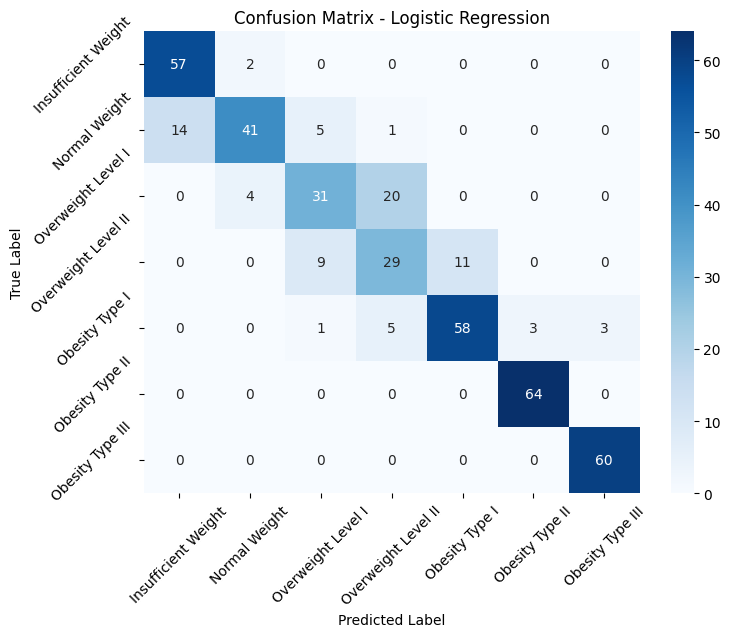

In [513]:
y_pred_log=logistic_model.predict(X_test)
cm_log=confusion_matrix(y_test,y_pred_log)
obesity_categories = [
    "Insufficient Weight", "Normal Weight", "Overweight Level I",
    "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"
]


def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=obesity_categories, yticklabels=obesity_categories)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()


plot_confusion_matrix(cm_log, "Confusion Matrix - Logistic Regression")


In [514]:
print("Logistic regression classification report")
print(classification_report(y_test,y_pred_log))

Logistic regression classification report
              precision    recall  f1-score   support

           0       0.80      0.97      0.88        59
           1       0.87      0.67      0.76        61
           2       0.67      0.56      0.61        55
           3       0.53      0.59      0.56        49
           4       0.84      0.83      0.83        70
           5       0.96      1.00      0.98        64
           6       0.95      1.00      0.98        60

    accuracy                           0.81       418
   macro avg       0.80      0.80      0.80       418
weighted avg       0.81      0.81      0.81       418



In [515]:
svm_model.score(X_test,y_test)

0.8636363636363636

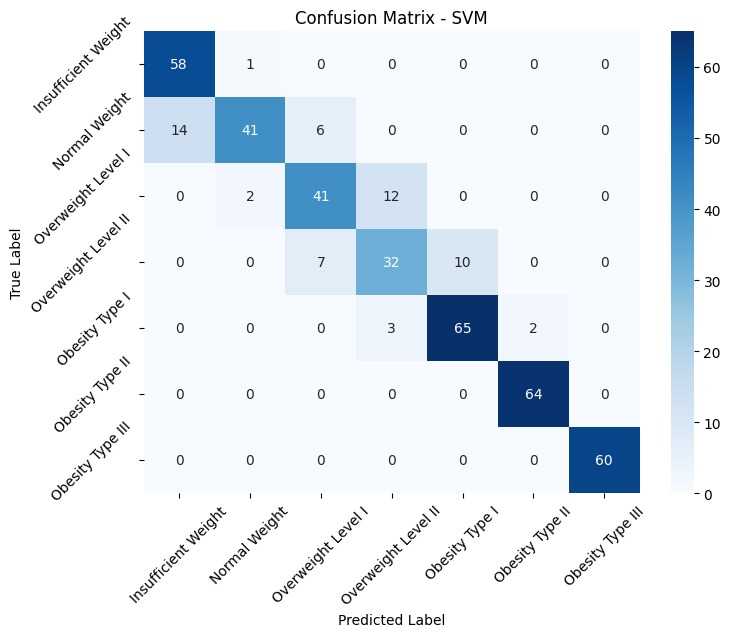

In [516]:
y_pred_svm=svm_model.predict(X_test)
cm_svm=confusion_matrix(y_test,y_pred_svm)
obesity_categories = [
    "Insufficient Weight", "Normal Weight", "Overweight Level I",
    "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"
]


def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=obesity_categories, yticklabels=obesity_categories)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(title)
    plt.xticks(rotation=45)
    plt.yticks(rotation=45)
    plt.show()



plot_confusion_matrix(cm_svm, "Confusion Matrix - SVM")

In [517]:
print("SVM model classification report")
print(classification_report(y_test,y_pred_svm))

SVM model classification report
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        59
           1       0.93      0.67      0.78        61
           2       0.76      0.75      0.75        55
           3       0.68      0.65      0.67        49
           4       0.87      0.93      0.90        70
           5       0.97      1.00      0.98        64
           6       1.00      1.00      1.00        60

    accuracy                           0.86       418
   macro avg       0.86      0.85      0.85       418
weighted avg       0.87      0.86      0.86       418



In [518]:
model=CatBoostClassifier(iterations=500,learning_rate=0.1,depth=6,verbose=0)
model.fit(X_train,y_train)


In [519]:
model.predict(X_test)

array([[4],
       [5],
       [2],
       [0],
       [5],
       [2],
       [3],
       [6],
       [0],
       [0],
       [5],
       [4],
       [6],
       [1],
       [3],
       [2],
       [2],
       [5],
       [3],
       [2],
       [6],
       [2],
       [1],
       [0],
       [4],
       [4],
       [0],
       [0],
       [0],
       [4],
       [1],
       [1],
       [4],
       [5],
       [3],
       [6],
       [1],
       [1],
       [0],
       [1],
       [1],
       [4],
       [2],
       [6],
       [1],
       [2],
       [5],
       [2],
       [1],
       [6],
       [3],
       [0],
       [4],
       [6],
       [6],
       [6],
       [2],
       [4],
       [3],
       [2],
       [3],
       [4],
       [1],
       [5],
       [1],
       [5],
       [4],
       [2],
       [3],
       [4],
       [3],
       [1],
       [4],
       [1],
       [4],
       [0],
       [5],
       [1],
       [0],
       [0],
       [2],
       [2],
       [6],
    

In [520]:
model.score(X_test,y_test)

0.9688995215311005

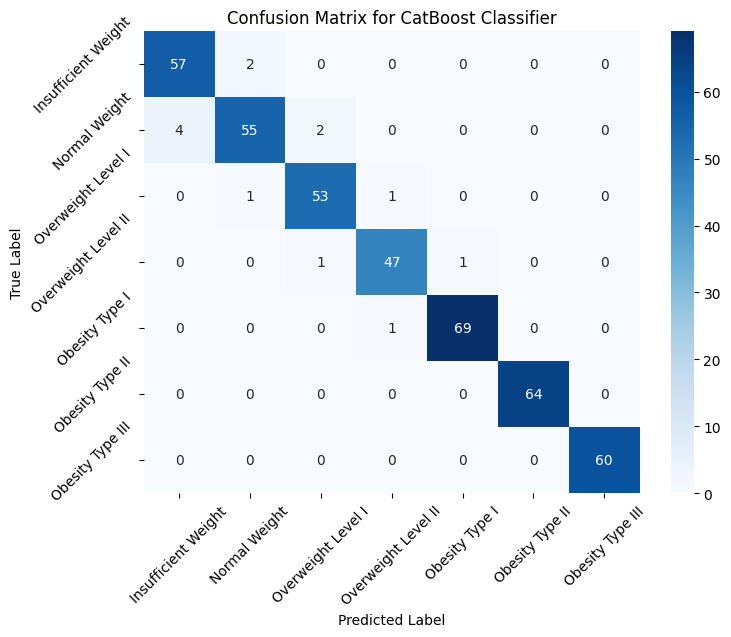

In [521]:

y_pred=model.predict(X_test)
cm=confusion_matrix(y_test,y_pred)
obesity_categories = [
    "Insufficient Weight", "Normal Weight", "Overweight Level I",
    "Overweight Level II", "Obesity Type I", "Obesity Type II", "Obesity Type III"
]


plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=obesity_categories, yticklabels=obesity_categories)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for CatBoost Classifier")
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [522]:

print("CatBoost model classification report")
print(classification_report(y_test,y_pred))



CatBoost model classification report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        59
           1       0.95      0.90      0.92        61
           2       0.95      0.96      0.95        55
           3       0.96      0.96      0.96        49
           4       0.99      0.99      0.99        70
           5       1.00      1.00      1.00        64
           6       1.00      1.00      1.00        60

    accuracy                           0.97       418
   macro avg       0.97      0.97      0.97       418
weighted avg       0.97      0.97      0.97       418



In [524]:
model.predict([[1,23,1.62,77.00,1,2.0,2.00,2.00]])

array([[3]], dtype=int64)

In [ ]:


model.save_model("catboost_model.cbm")
